In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db




  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

In [ ]:
salary=pd.read_csv("/content/salary_data.csv")
salary.head()
X=salary['YearsExperience'].values.reshape(-1,1)
Y=np.array(salary['Salary'])
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
from sklearn.model_selection import *
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.33,random_state=1)

In [ ]:
xtrain=np.array([[ 2.9],
       [ 9.6],
       [ 4. ],
       [ 2.2],
       [ 3.9],
       [ 5.1],
       [10.3],
       [ 9. ],
       [ 5.3],
       [ 1.5],
       [ 3.2],
       [ 9.5],
       [ 8.7],
       [ 5.9],
       [ 4. ],
       [ 7.9],
       [10.5],
       [ 4.1],
       [ 4.9],
       [ 3.2]])
ytrain=[ 56642, 112635,  56957,  39891,  63218,  66029, 122391, 105582,
        83088,  37731,  54445, 116969, 109431,  81363,  55794, 101302,
       121872,  57081,  67938,  64445]
xtest=np.array([[1.3],
       [1.1],
       [4.5],
       [3.7],
       [7.1],
       [6.0],
       [8.2],
       [3.0],
       [2.0],
       [6.8]])
ytest=[ 46205,  39343,  61111,  57189,  98273,  93940, 113812,  60150,
        43525,  91738]

In [ ]:
model=Lasso_Regression(learning_rate=0.02,no_of_iterations=1000,lambda_parameter=200)
model.fit(xtrain,ytrain)

In [ ]:


pred=model.predict(xtest)
print(xtest)
print(ytest)

[[1.3]
 [1.1]
 [4.5]
 [3.7]
 [7.1]
 [6. ]
 [8.2]
 [3. ]
 [2. ]
 [6.8]]
[46205, 39343, 61111, 57189, 98273, 93940, 113812, 60150, 43525, 91738]


In [ ]:
pred

array([ 36068.90441536,  34166.14804787,  66513.00629512,  58901.98082518,
        91248.83907243,  80783.67905126, 101713.9990936 ,  52242.33353898,
        42728.55170156,  88394.7045212 ])

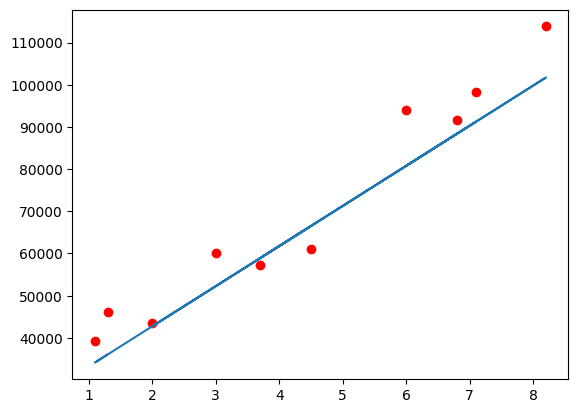

In [ ]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,pred)
plt.xlabel=("experience")
plt.ylabel=("salary")
plt.show()


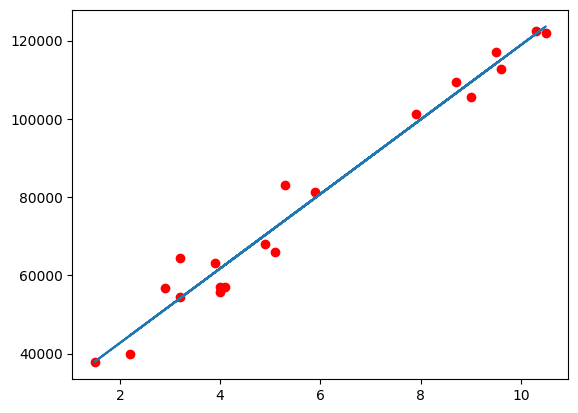

In [ ]:
prediction1=model.predict(xtrain)
prediction1
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,prediction1)
plt.xlabel=("experience")
plt.ylabel=("salary")
plt.show()

